In [74]:
dat = read.csv(file="./week_4_callers.csv", header=TRUE)

In [77]:
head(dat)

calls,days_active,isgroup2,age
2,32,0,27
4,81,0,32
0,41,0,22
1,36,0,28
0,55,0,31
0,25,0,33


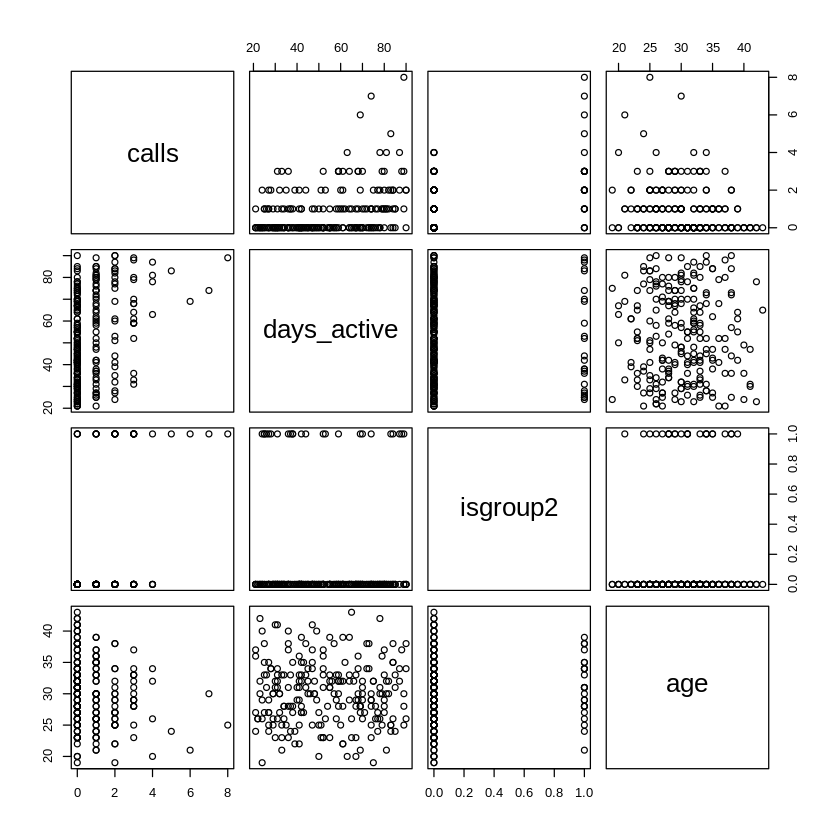

In [78]:
pairs(dat)

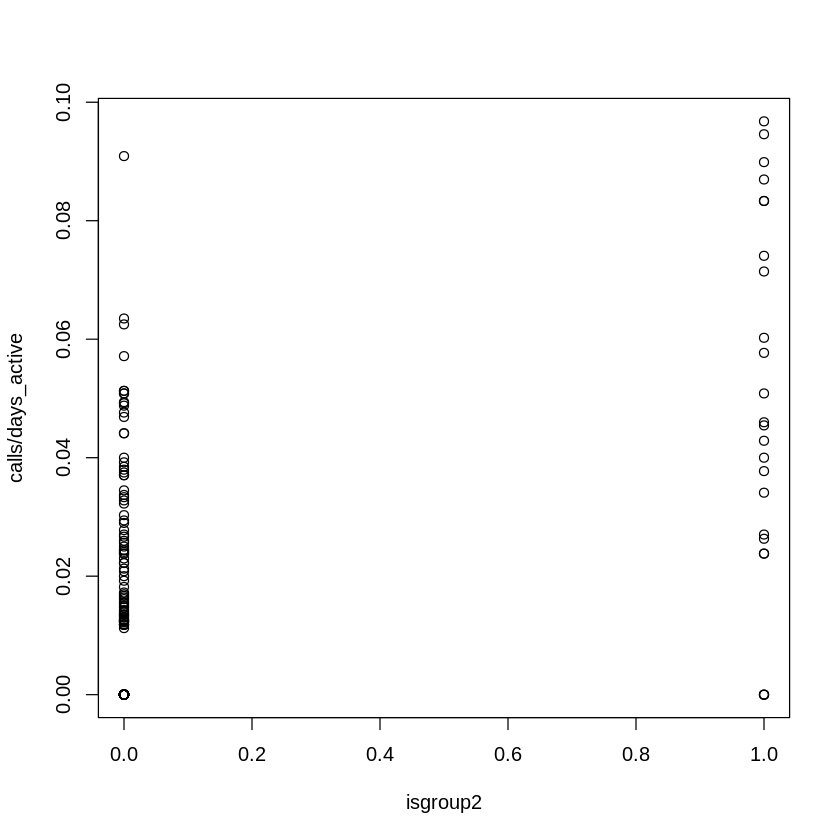

In [15]:
plot(calls/days_active ~ isgroup2, data = dat)

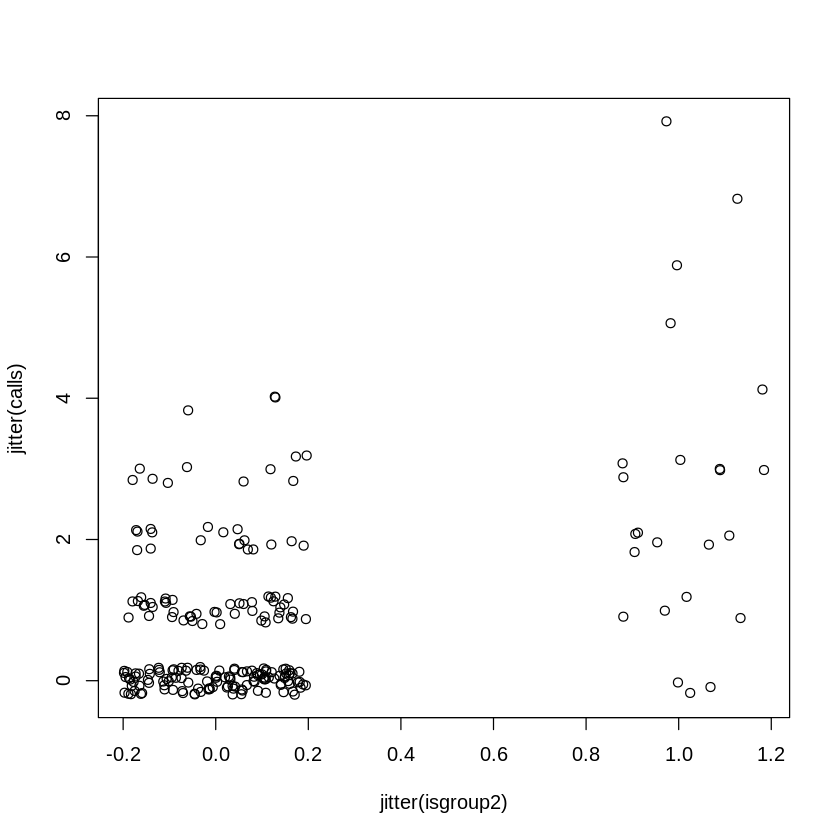

In [18]:
plot(jitter(calls) ~ jitter(isgroup2), data = dat)

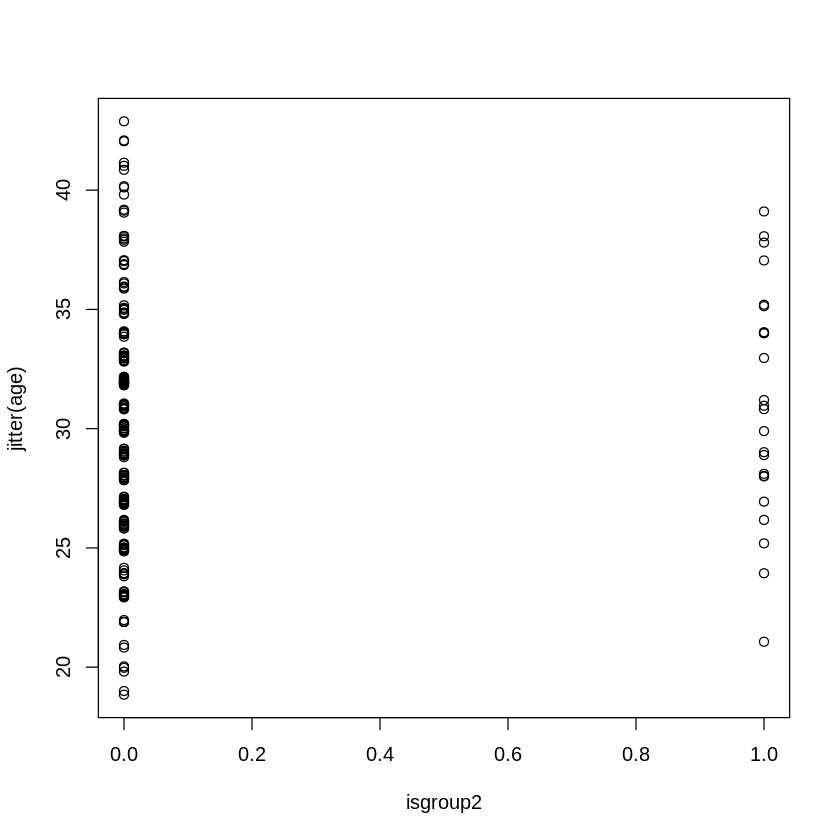

In [19]:
plot(jitter(age) ~ isgroup2, data = dat)

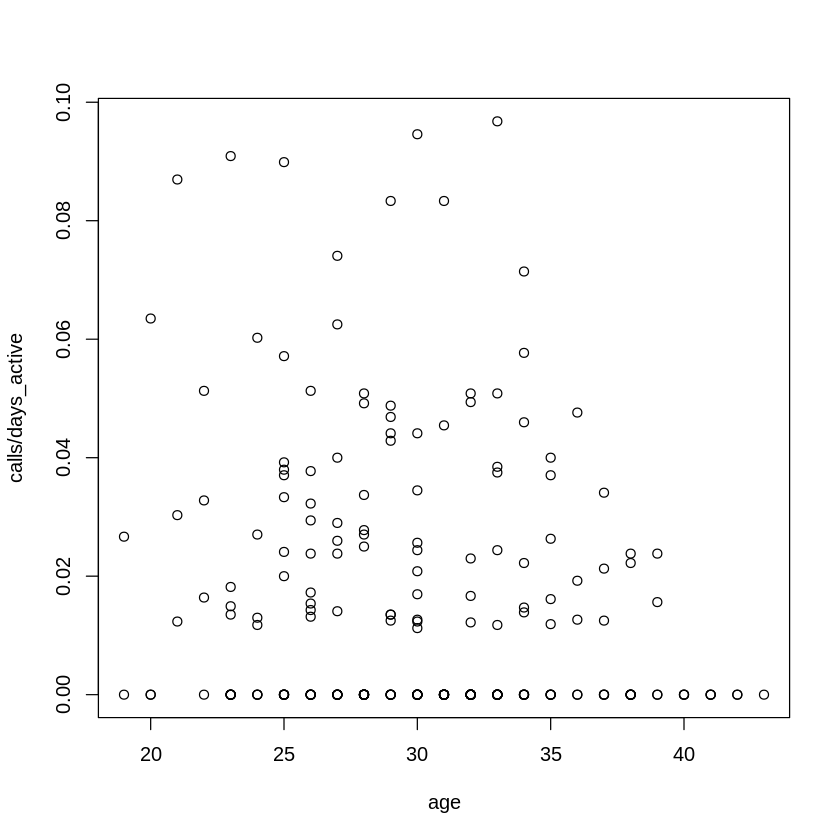

In [20]:
plot(calls/days_active ~ age, data = dat)

In [21]:
source("../shared.R")

Loading required package: coda
Linked to JAGS 4.3.0
Loaded modules: basemod,bugs


In [79]:
str_mod = " model {
    for (i in 1:length(calls)) {
        calls[i] ~ dpois(days_active[i] * lam[i])
        log(lam[i]) = b0 + b[1]*age[i] + b[2]*isgroup2[i]
    }
    
    b0 ~ dnorm(0, 1/10^2)
    for (j in 1:2){
        b[j] ~ dnorm(0, 1/10^2)
    }
}"

jags_dat = as.list(dat)
mod = jags_model_compile(str_mod, jags_dat, burnout = 1e3)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 224
   Unobserved stochastic nodes: 3
   Total graph size: 1220

Initializing model



In [80]:
modsim = jags_model_sample(mod, var_names_ = c('b0', 'b'), n_iter_ = 1e4)

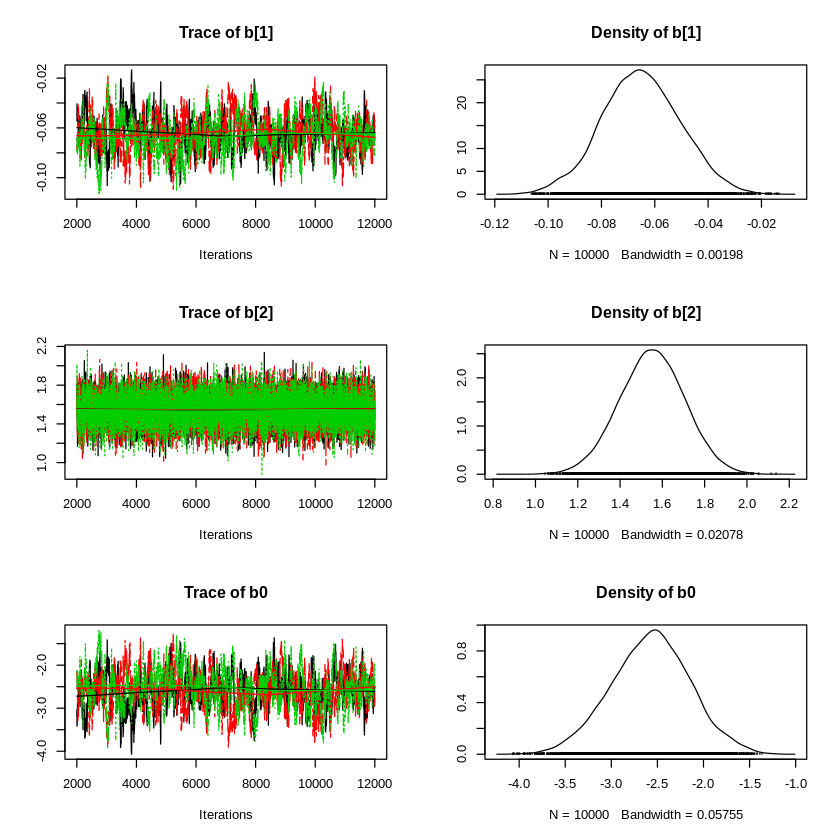

In [81]:
plot(modsim$samples)

In [85]:
moddiag = jags_model_diag(samples_ = modsim$samples)

In [86]:
moddiag$eff_size

b[1]      b[2]        b0 
 288.4842 9822.8636  294.8831

In [84]:
mean(modsim$samples_cmb[,"b[2]"] > 0)

[1] 1

## Model checking

In [87]:
summary(modsim$samples_cmb)


Iterations = 1:30000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 30000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
b[1] -0.06503 0.01468 8.476e-05      0.0008702
b[2]  1.55058 0.15408 8.896e-04      0.0015639
b0   -2.57430 0.42677 2.464e-03      0.0253302

2. Quantiles for each variable:

         2.5%      25%      50%      75%    97.5%
b[1] -0.09435 -0.07503 -0.06528 -0.05514 -0.03582
b[2]  1.24435  1.44770  1.55192  1.65481  1.84936
b0   -3.43360 -2.85752 -2.56289 -2.28444 -1.73188


In [88]:
params = apply(modsim$samples_cmb, 2, mean)
params[c('b[1]', 'b[2]')]

b[1]        b[2] 
-0.06503154  1.55058390

In [89]:
X = as.matrix(dat[, c('age', 'isgroup2')])

In [90]:
lam_hat = exp( params["b0"] + X %*% params[c('b[1]', 'b[2]')])
yhat = lam_hat*dat[,'days_active']

In [91]:
resid  = dat[,'calls'] - yhat

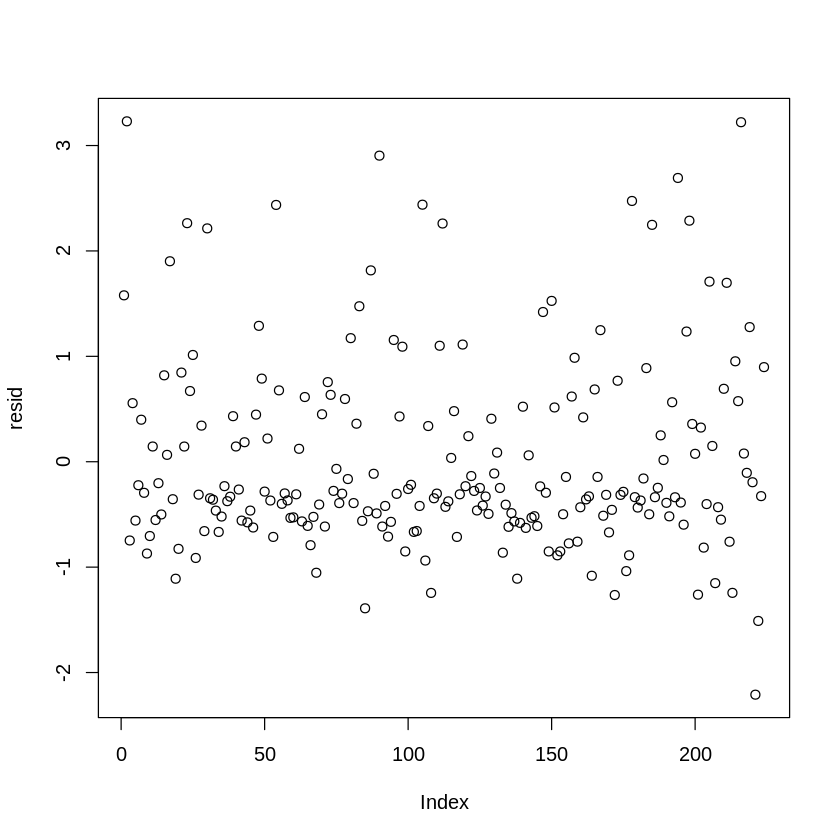

In [92]:
plot(resid)

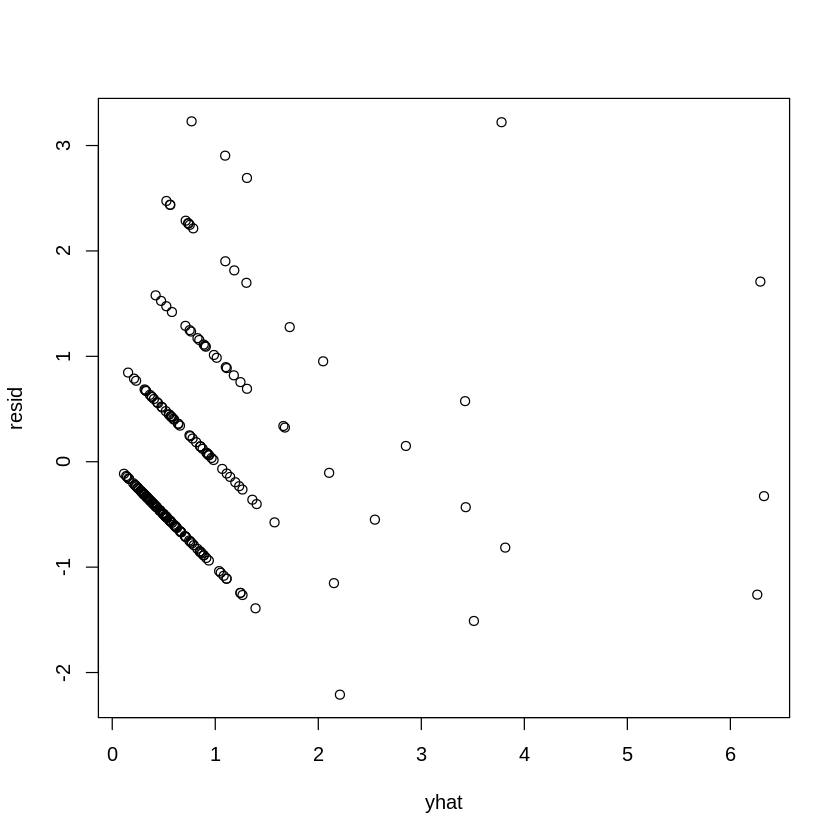

In [94]:
plot(yhat, resid)